In [2]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as jr

from _gbm import multi_simulate_gbm

Here is some markdown text

In [3]:
keys = jr.split(jr.key(123), 100)
sols = multi_simulate_gbm(
    1.0,
    0.1,
    1.0,
    0.01,
    jnp.array([1.0]),
    keys
)

In [4]:
sols

Solution(
  t0=f32[100],
  t1=f32[100],
  ts=f32[100,101],
  ys=f32[100,101,1],
  interpolation=None,
  stats={
    'max_steps': weak_i32[100],
    'num_accepted_steps': weak_i32[100],
    'num_rejected_steps': weak_i32[100],
    'num_steps': weak_i32[100]
  },
  result=EnumerationItem(
    _value=i32[100], _enumeration=diffrax._solution.RESULTS
  ),
  solver_state=None,
  controller_state=None,
  made_jump=None,
  event_mask=None
)

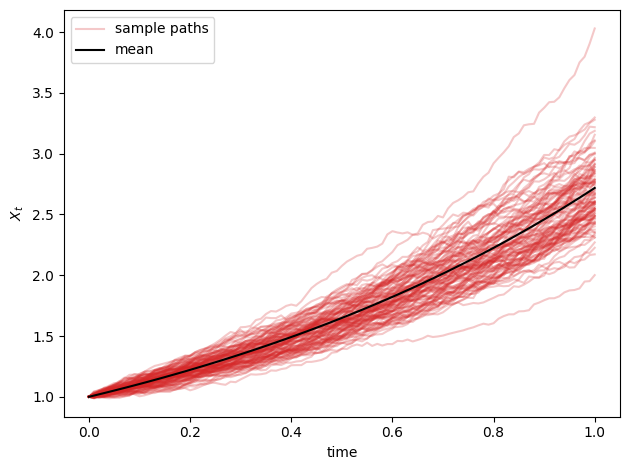

In [18]:
plt.plot(sols.ts[0], sols.ys[0, ..., 0].T, color="tab:red", alpha=0.25, label="sample paths")
plt.plot(sols.ts[0], sols.ys[1:, ..., 0].T, color="tab:red", alpha=0.25)
plt.plot(sols.ts[0], jnp.exp(sols.ts[0]), color="black", label="mean")
plt.xlabel("time")
plt.ylabel(r"$X_t$")
plt.legend()
plt.tight_layout()
plt.show()